In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/My\ Drive/Deep_Learning_Project_1

/content/drive/My Drive/Deep_Learning_Project_1


In [0]:
import torch
import math
import numpy as np
import dlc_practical_prologue as prologue
from torch import optim
from torch import Tensor
from torch import nn
from torch.nn import functional as F
from helpers import *
from NaiveSiamese import NaiveSiamese
from EnhancedSiamese import EnhancedSiamese
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2


In [0]:
N = 1000 # Number of data samples in training and test set

# load data from source
train_input, train_target, train_classes, \
    test_input, test_target, test_classes = prologue.generate_pair_sets(N)

# use 1-hot encoding for targets
train_target = encode_to_one_hot(train_target)
test_target = encode_to_one_hot(test_target)

In [0]:
mean = train_input.mean(dim=(0,2,3), keepdim=True)
std = train_input.std(dim=(0,2,3), keepdim=True)

# Normalize data by removing mean and subtracting by the std
normalize(train_input, mean, std)
normalize(test_input, mean, std)

# Preprocess the data 
train_input_1, train_input_2, train_classes_1, train_classes_2 = process_data(train_input, train_classes)
test_input_1, test_input_2, test_classes_1, test_classes_2 = process_data(test_input, test_classes)

In [6]:
verbose = True

nb_rounds = 10

# Containers for error rates ( 0 < error < 1 )
errors_naive_noWS = np.zeros(nb_rounds)
errors_noWS = np.zeros(nb_rounds)
errors = np.zeros(nb_rounds)
errors_naive = np.zeros(nb_rounds)

# Few tweaking parameters

nb_epochs = 75 # Number of epochs
lr = 0.5*1e-1 # learning rate of the gradient descent algorithm
nb_hidden = 500 # Size of the hidden layer 


for i in range(0,nb_rounds):
    
    print('Round {}'.format(i))
    
    # Data shuffling 
    train_input_1,train_input_2,train_classes_1,train_classes_2,train_target = shuffle_data(train_input_1,train_input_2,train_classes_1,train_classes_2,train_target)
    
    # Naive siamese train and test without weight sharing
    naive_siamese_noWS = NaiveSiamese(nb_hidden=nb_hidden, weight_sharing = False) # for weight reinitialization
    naive_siamese_noWS.train(train_input_1,train_input_2,train_target,nb_epochs=nb_epochs,lr=lr,verbose=verbose)
    error_naive_noWS = naive_siamese_noWS.test(test_input_1,test_input_2,test_target)
    
    # Enhanced siamese train and test without weight sharing
    enhanced_siamese_noWS = EnhancedSiamese(nb_hidden=nb_hidden, weight_sharing = False) # for weight reinitialization
    enhanced_siamese_noWS.train(train_input_1,train_input_2,train_classes_1,train_classes_2,train_target,nb_epochs=nb_epochs,lr=lr,verbose=verbose)
    error_noWS = enhanced_siamese_noWS.test(test_input_1,test_input_2,test_target)
    
    # Naive siamese train and test with weight sharing
    naive_siamese = NaiveSiamese(nb_hidden=nb_hidden) # for weight reinitialization
    naive_siamese.train(train_input_1,train_input_2,train_target,nb_epochs=nb_epochs,lr=lr,verbose=verbose)
    error_naive = naive_siamese.test(test_input_1,test_input_2,test_target)
    
    # Enhanced siamese train and test with weight sharing
    enhanced_siamese = EnhancedSiamese(nb_hidden=nb_hidden) # for weight reinitialization
    enhanced_siamese.train(train_input_1,train_input_2,train_classes_1,train_classes_2,train_target,nb_epochs=nb_epochs,lr=lr,verbose=verbose)
    error = enhanced_siamese.test(test_input_1,test_input_2,test_target)
    
    # Fill results
    errors[i] = error
    errors_naive[i] = error_naive
    errors_noWS[i] = error_noWS
    errors_naive_noWS[i] = error_naive_noWS

mean,std = errors.mean(),errors.std()
mean_naive,std_naive = errors_naive.mean(),errors_naive.std()
mean_noWS,std_noWS = errors_noWS.mean(),errors_noWS.std()
mean_naive_noWS,std_naive_noWS = errors_naive_noWS.mean(),errors_naive_noWS.std()
    

Round 0
Epochs 1
loss = 0.6883059740066528
Epochs 6
loss = 0.6484355926513672
Epochs 11
loss = 0.4148363769054413
Epochs 16
loss = 0.33056581020355225
Epochs 21
loss = 0.22793252766132355
Epochs 26
loss = 0.1563594490289688
Epochs 31
loss = 0.02305786870419979
Epochs 36
loss = 0.0030459631234407425
Epochs 41
loss = 0.002335181925445795
Epochs 46
loss = 0.00044857675675302744
Epochs 51
loss = 0.001202636631205678
Epochs 56
loss = 0.00019624589185696095
Epochs 61
loss = 0.00024312007008120418
Epochs 66
loss = 0.0008723390637896955
Epochs 71
loss = 0.00029338765307329595
Epochs 1
loss = 4.167311191558838, loss_img = 3.4866857528686523, loss_comp = 0.6806253790855408
Epochs 6
loss = 0.9535805583000183, loss_img = 0.5456689596176147, loss_comp = 0.40791159868240356
Epochs 11
loss = 0.5258473753929138, loss_img = 0.2398889660835266, loss_comp = 0.2859584093093872
Epochs 16
loss = 0.21645604074001312, loss_img = 0.06212478503584862, loss_comp = 0.1543312519788742
Epochs 21
loss = 0.0704012662

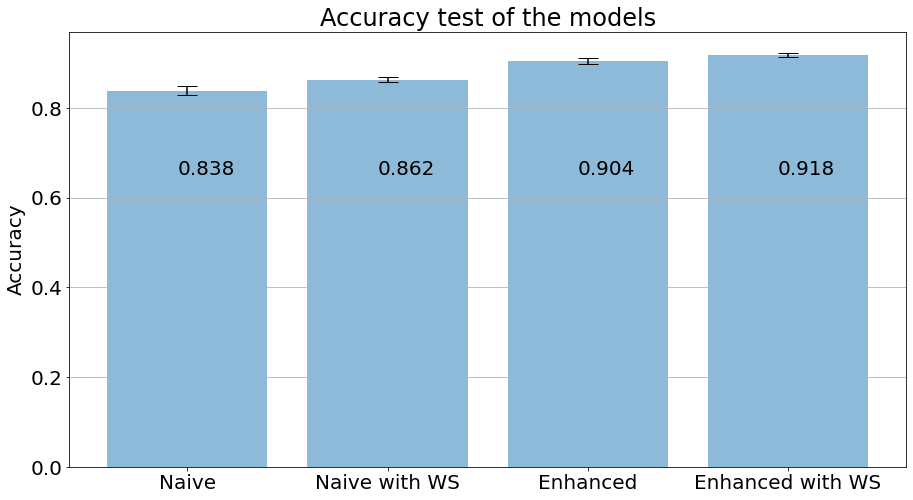

In [47]:
model_names = ['Naive','Naive with WS','Enhanced', 'Enhanced with WS']
x_pos = np.arange(len(model_names))
means = [1-mean_naive_noWS, 1-mean_naive,1-mean_noWS,1-mean]
stds = [std_naive_noWS,  std_naive,std_noWS, std]

# Build the plot
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names)
ax.set_title('Accuracy test of the models')
ax.yaxis.grid(True)

for i, m in enumerate(means):
    ax.text(i-0.05, 0.65 , "{:0.3f}".format(m))

# Save the figure and show
plt.show()

fig.savefig('results.pdf',format='pdf',orientation='landscape')

In [48]:
print(means)

[0.8379, 0.8624, 0.9044, 0.918]
